In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

In [68]:
# Filter input
window_size=300
slice_index=160  

In [69]:
# Set paths to file location
data_path="/Users/josephgiliberto/Builds/NGA2/examples/simplex/test_data/smp_01"

# Import data
data=pd.DataFrame({'time':np.genfromtxt(data_path,skip_header=2,usecols=1),
                   'time_step_size':np.genfromtxt(data_path,skip_header=2,usecols=2),
                   'Pmax':np.genfromtxt(data_path,skip_header=2,usecols=7),
                   'vof_integral':np.genfromtxt(data_path,skip_header=2,usecols=8),
                   'vof_removed':np.genfromtxt(data_path,skip_header=2,usecols=9)})

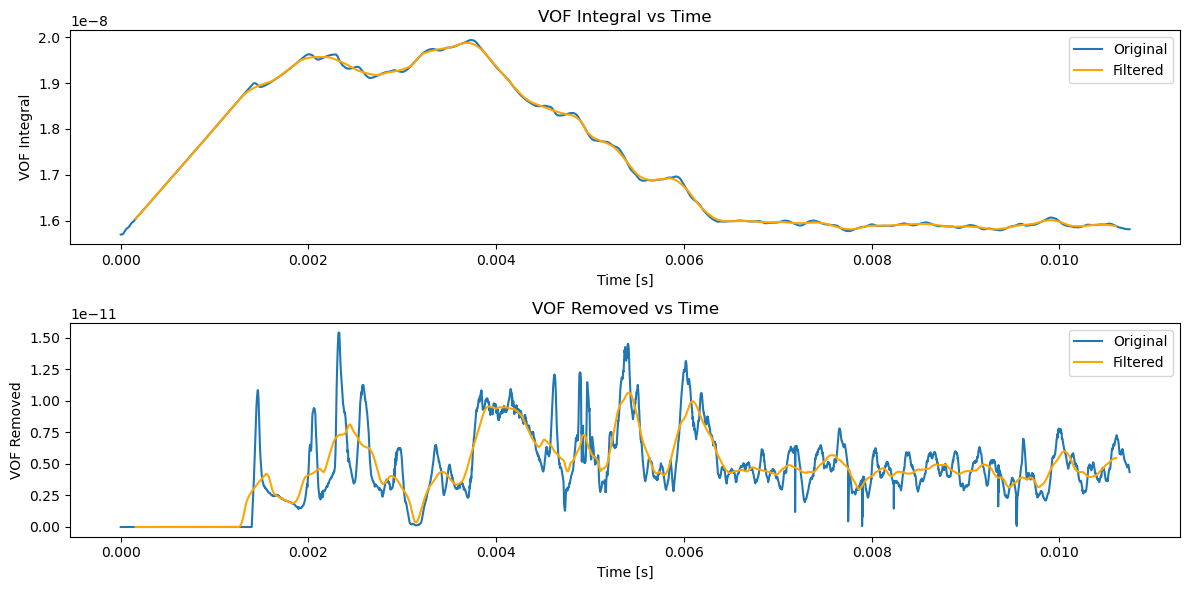

In [70]:
# Apply the low pass filter
filtered_signal_integral = moving_average(data.vof_integral, window_size)
filtered_signal_removed = moving_average(data.vof_removed, window_size)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.time, data.vof_integral, label='Original')
plt.plot(data.time[slice_index:-slice_index], filtered_signal_integral[slice_index:-slice_index], label='Filtered', color='orange')
plt.title('VOF Integral vs Time')
plt.xlabel('Time [s]')
plt.ylabel('VOF Integral')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.time, data.vof_removed, label='Original')
plt.plot(data.time[slice_index:-slice_index], filtered_signal_removed[slice_index:-slice_index], label='Filtered', color='orange')
plt.title('VOF Removed vs Time')
plt.xlabel('Time [s]')
plt.ylabel('VOF Removed')
plt.legend()
plt.tight_layout()
plt.show()

## Approximate flow rate out of domain through VOF removed

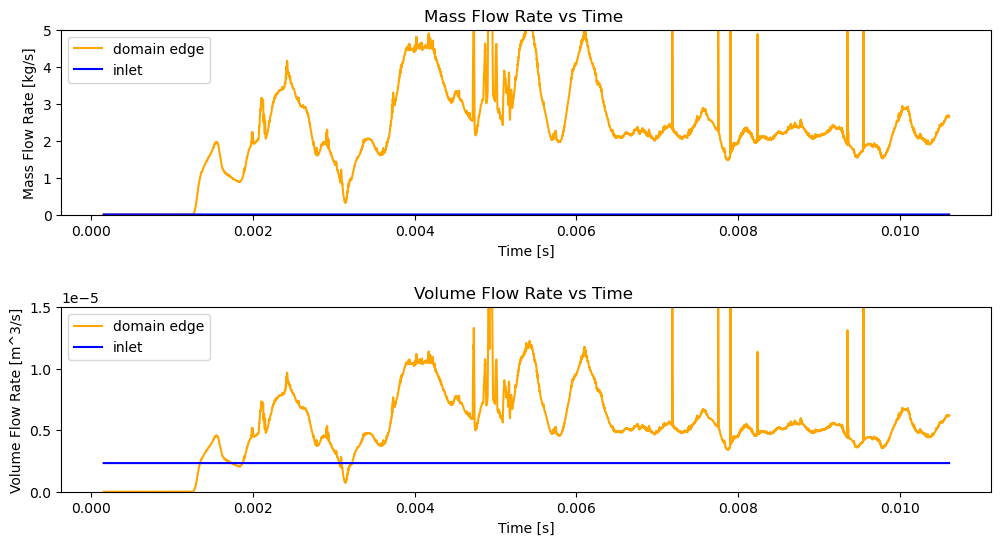

In [86]:
# Convert VOF removed to mass flow rate in kg/s
rho_l          = 770 # (kg/m^3) density of water
vol_removed    = filtered_signal_removed[slice_index:-slice_index] # (m^3)  volume of liquid being removed with time
vol_flow_rate  = vol_removed/data.time_step_size[slice_index:-slice_index] # (m^3/s) volume flow rate at of the liquid being removed
mass_flow_rate = vol_flow_rate*rho_l # (kg/s) mass flow rate of the water being removed

# Prescribed mass inflow 
mfr           = 1.79e-3 # (kg/s) mass flow rate being imposed at the inlet
vol_fr        = mfr/rho_l # (m^3/s) volume flow rate being imposed at the inlet 
mfr_inflow    = mfr*np.ones(len(mass_flow_rate))
vol_fr_inflow = vol_fr*np.ones(len(vol_flow_rate))

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.time[slice_index:-slice_index], mass_flow_rate/mfr, label='domain edge', color='orange')
plt.plot(data.time[slice_index:-slice_index], mfr_inflow , label='inlet', color='blue')
plt.title('Mass Flow Rate vs Time ')
plt.xlabel('Time [s]')
plt.ylabel('Mass Flow Rate [kg/s]')
plt.ylim(0, 5)
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 2)
plt.plot(data.time[slice_index:-slice_index], vol_flow_rate, label='domain edge', color='orange')
plt.plot(data.time[slice_index:-slice_index], vol_fr_inflow , label='inlet', color='blue')
plt.title('Volume Flow Rate vs Time ')
plt.xlabel('Time [s]')
plt.ylabel('Volume Flow Rate [m^3/s]')
plt.ylim(0, 1.5e-5)
plt.legend()

## Plot maximum pressure

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


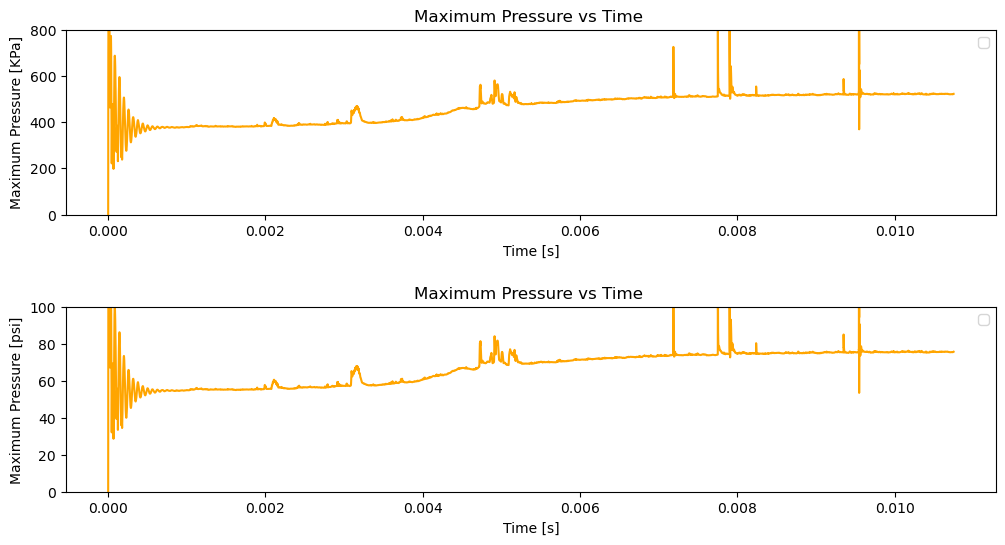

In [82]:
# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.time, data.Pmax/1000.0, color='orange')
plt.title('Maximum Pressure vs Time ')
plt.xlabel('Time [s]')
plt.ylabel('Maximum Pressure [KPa]')
plt.ylim(0, 800)
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 2)
plt.plot(data.time, data.Pmax/6895.0, color='orange')
plt.title('Maximum Pressure vs Time ')
plt.xlabel('Time [s]')
plt.ylabel('Maximum Pressure [psi]')
plt.ylim(0, 100)
plt.legend()

In [83]:
print(np.average(data.Pmax))

466510.86283618584
